<a href="https://colab.research.google.com/github/M-Kamalakannan/Topic-Modelling/blob/main/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv("https://drive.google.com/file/d/1PKOPjLzoximyWv_iAHeyqzwklP40AYA9/view?usp=drive_link")
papers.head()

,RecordID,CustomerInteractionRawText,AgentAssignedTopic,LocationID,CallDurationSeconds,AgentID,CustomerID
0,1890041,Cus not satisfied with service. want to port o...,Port Out,8.0,10.0,z88Nr,5Ms7y
1,1890042,Jadav called to check his porting out status. ...,Port Out,1.0,6.0,xGAVI,s8Zyb
2,1890043,Customer thraetened to cancel her service. Sai...,Port Out,9.0,15.0,T7Kdd,3IB8J
3,1890044,called to ask steps for porting out. She is le...,Port Out,5.0,15.0,jtifd,mtR3W
4,1890045,Customer dissatisfied with support. Connectivi...,Port Out,7.0,13.0,hxY3d,DbBmN


In [ ]:
papers.shape

(103, 7)

In [ ]:
papers["CustomerInteractionRawText"]

0      Cus not satisfied with service. want to port o...
1      Jadav called to check his porting out status. ...
2      Customer thraetened to cancel her service. Sai...
3      called to ask steps for porting out. She is le...
4      Customer dissatisfied with support. Connectivi...
                             ...                        
98                                 Checking IMEI status.
99     Called to report demise of her grandmother & w...
100                                Checking IMEI status.
101                                               #call?
102    Se verificaron nuevas aplicaciones en el mercado.
Name: CustomerInteractionRawText, Length: 103, dtype: object

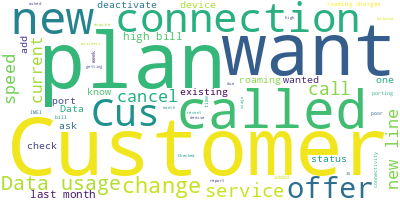

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['CustomerInteractionRawText'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3,
contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc))

if word not in stop_words] for doc in texts]

data = papers.CustomerInteractionRawText.values.tolist()
data_words = list(sent_to_words(data))

# Remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

['cus', 'satisfied', 'service', 'want', 'port', 'idea', 'network']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['cus', 'satisfied', 'service', 'want', 'port', 'idea', 'network']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
data_words

[['cus', 'satisfied', 'service', 'want', 'port', 'idea', 'network'],
 ['jadav', 'called', 'check', 'porting', 'status', 'shared', 'information'],
 ['customer',
  'thraetened',
  'cancel',
  'service',
  'said',
  'idea',
  'offerring',
  'much',
  'better',
  'options'],
 ['called', 'ask', 'steps', 'porting', 'leaving', 'india'],
 ['customer',
  'dissatisfied',
  'support',
  'connectivity',
  'poor',
  'region',
  'wanted',
  'port',
  'bsnl'],
 ['port', 'options', 'tried', 'retain', 'xferred', 'manager'],
 ['customer',
  'wanted',
  'port',
  'transferred',
  'offer',
  'better',
  'plans',
  'retain'],
 ['kumar', 'called', 'ask', 'porting', 'status', 'moving', 'bsnl'],
 ['cus',
  'wanted',
  'cancel',
  'connection',
  'transferred',
  'port',
  'management',
  'team'],
 ['porting', 'high', 'bill', 'data', 'plans'],
 ['nicki', 'called', 'inform', 'poor', 'connectivity', 'kannur', 'region'],
 ['low', 'speed', 'connection', 'reported', 'uppala', 'area'],
 ['cellular',
  'connection',


In [ ]:
from pprint import pprint
# Number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
id2word=id2word,
num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.048*"customer" + 0.021*"data" + 0.021*"new" + 0.021*"usage" + '
  '0.020*"want" + 0.017*"called" + 0.017*"connection" + 0.014*"wants" + '
  '0.014*"plans" + 0.013*"month"'),
 (1,
  '0.038*"plans" + 0.032*"called" + 0.029*"want" + 0.027*"new" + '
  '0.024*"customer" + 0.018*"change" + 0.015*"cus" + 0.012*"plan" + '
  '0.011*"connection" + 0.011*"current"')]
